Aluno: Luiz Felipe Folha Tavares<br>
Turma: MBED-2<br>
Atividade 3

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import set_config 
from sklearn.ensemble import RandomForestRegressor


In [143]:
df = pd.read_csv("carros.csv")
df.head(10)

,Unnamed: 0,car_name,prices,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Age
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,1,0,1,2017,1956,5,6
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,4,1,1,2021,1330,5,2
2,2,Toyota Camry 2.5 G,16.40,60343.0,4,1,1,2016,2494,5,7
3,3,Honda Jazz VX CVT,7.77,26696.0,4,1,1,2018,1199,5,5
4,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,4,0,1,2016,1199,5,7
5,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,4,1,1,2017,1197,5,6
6,6,Volkswagen Vento 1.2 TSI Highline Plus AT,7.58,43688.0,4,1,1,2017,1197,5,6
7,7,Honda WR-V VX Diesel,11.60,14470.0,1,0,1,2021,1498,5,2
8,8,Honda City i VTEC CVT SV,6.99,21429.0,4,1,1,2015,1497,5,8
9,9,Renault Duster Petrol RXS CVT,7.53,31750.0,4,1,1,2017,1498,5,6


# Obtendo informações do dataset

In [144]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5512 non-null   int64  
 1   car_name      5512 non-null   object 
 2   prices        5512 non-null   float64
 3   kms_driven    5512 non-null   float64
 4   fuel_type     5512 non-null   int64  
 5   transmission  5512 non-null   int64  
 6   ownership     5512 non-null   int64  
 7   manufacture   5512 non-null   int64  
 8   engine        5512 non-null   int64  
 9   Seats         5512 non-null   int64  
 10  Age           5512 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 473.8+ KB


(5512, 11)

In [145]:
df.describe(include='all')


,Unnamed: 0,car_name,prices,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Age
count,5512.000000,5512,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
unique,NaN,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Maruti Alto 800 LXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2755.500000,NaN,1700.984784,63211.888062,2.613026,0.281205,1.421807,2015.455552,1532.299710,5.250726,7.544448
std,1591.321673,NaN,11471.329530,41844.131167,1.510117,0.449628,0.703092,3.927974,579.210876,0.720075,3.927974
min,0.000000,NaN,1.000000,250.000000,0.000000,0.000000,0.000000,1995.000000,0.000000,2.000000,1.000000
25%,1377.750000,NaN,3.250000,33151.750000,1.000000,0.000000,1.000000,2013.000000,1197.000000,5.000000,5.000000
50%,2755.500000,NaN,5.640000,59000.000000,4.000000,0.000000,1.000000,2016.000000,1396.000000,5.000000,7.000000
75%,4133.250000,NaN,10.892500,84265.250000,4.000000,1.000000,2.000000,2018.000000,1950.000000,5.000000,10.000000


# Realizando uma pequena limpeza nos dados

In [312]:
df2 = df.query('prices < 10') #obtendo nsomente valores com até o dobro da mediana do preço
df2.describe()

,prices,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Age
count,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000
mean,4.559314,68745.588162,2.794827,0.127580,1.460333,2014.860234,1474.273066,5.242477,8.139766
std,2.276262,43094.751264,1.493246,0.333663,0.724985,3.649080,538.267324,0.706858,3.649080
min,1.000000,1026.000000,0.000000,0.000000,1.000000,1995.000000,0.000000,2.000000,1.000000
25%,2.710000,40000.000000,1.000000,0.000000,1.000000,2012.000000,1197.000000,5.000000,5.000000
50%,4.250000,64000.000000,4.000000,0.000000,1.000000,2015.000000,1248.000000,5.000000,8.000000
75%,6.150000,90000.000000,4.000000,0.000000,2.000000,2018.000000,1590.000000,5.000000,11.000000
max,9.990000,560000.000000,4.000000,1.000000,5.000000,2022.000000,5461.000000,8.000000,28.000000



# Data Exploration & Visualization

C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


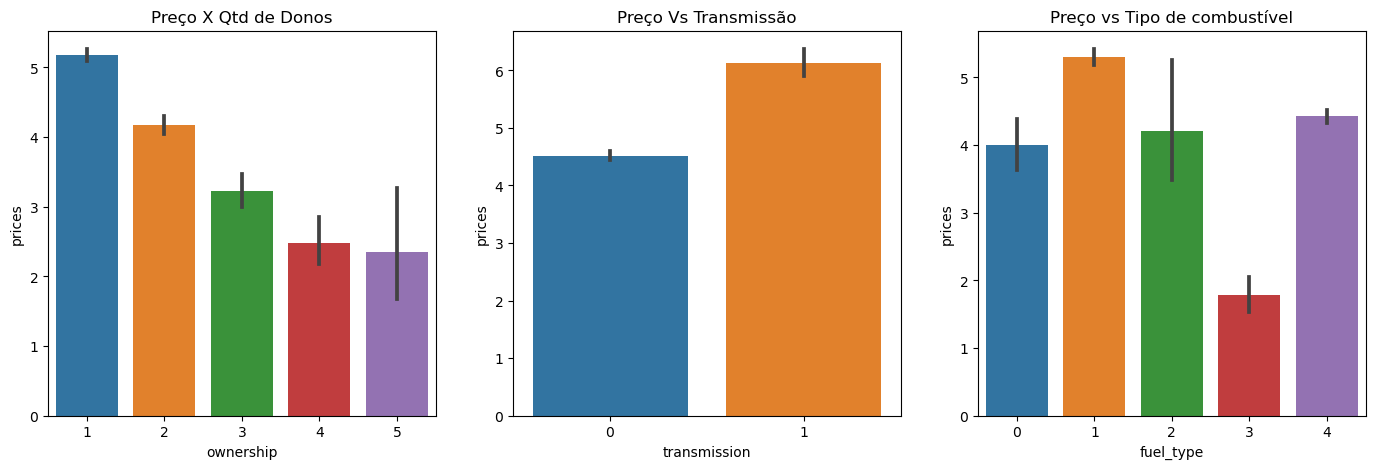

In [198]:

plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df2['ownership'], df2['prices'])
plt.title('Preço X Qtd de Donos')

plt.subplot(1,3,2)
sns.barplot(df2['transmission'],df2['prices'])
plt.title('Preço Vs Transmissão')

plt.subplot(1,3,3)
sns.barplot(df2['fuel_type'],df2['prices'])
plt.title('Preço vs Tipo de combustível')

plt.show()

C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


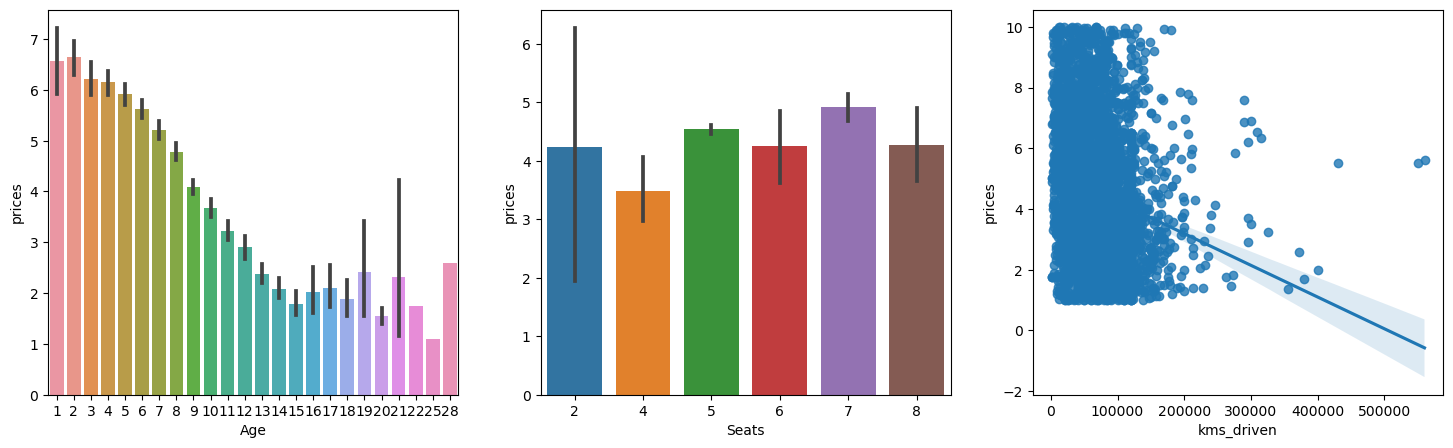

In [313]:
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
sns.barplot(df2['Age'],df2['prices'])

plt.subplot(1,3,2)
sns.barplot(df2['Seats'],df2['prices'])

plt.subplot(1,3,3)
sns.regplot(df2['kms_driven'], df2['prices'])
plt.show()

C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RCS-012062\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


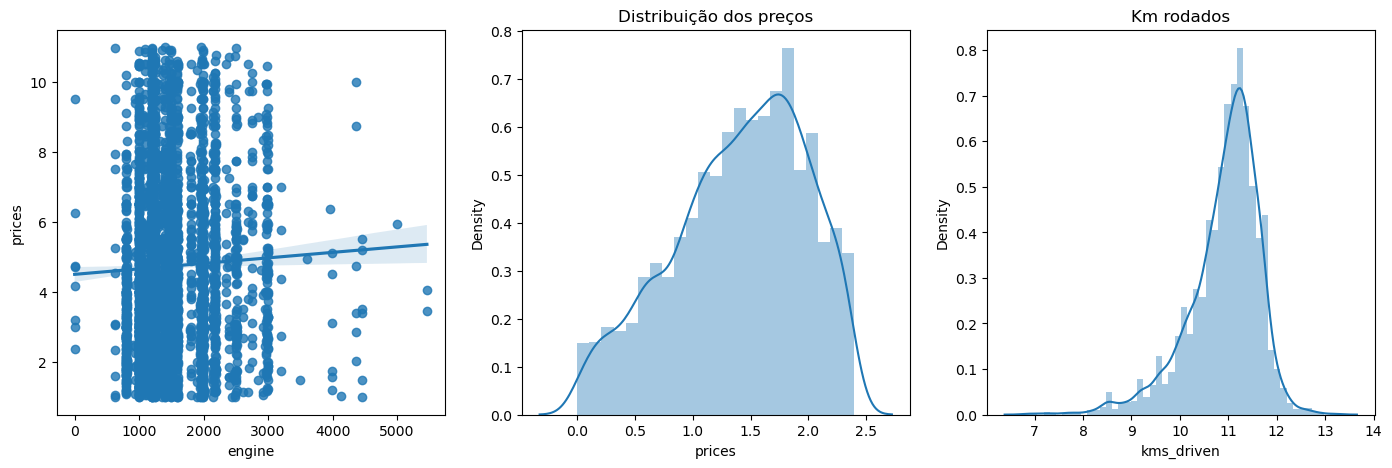

In [200]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df2['engine'],df2['prices'])

plt.subplot(1,3,2)
sns.distplot(np.log(df2['prices']))
plt.title('Distribuição dos preços')


plt.subplot(1,3,3)
sns.distplot(np.log(df2['kms_driven']))
plt.title('Distribuição da kilometragem')


plt.title('Km rodados')
plt.show()

In [149]:
df2 = df2.drop(labels='car_name', axis=1)

# Observando a multicolinearidade e p-valor

In [201]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df2[['prices','kms_driven','ownership','Age','fuel_type','transmission']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.138156,prices
1,4.744538,kms_driven
2,5.690367,ownership
3,8.043618,Age
4,3.680091,fuel_type
5,1.225643,transmission


In [325]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest


X = df2.drop('prices', axis=1)
y = df2["prices"]    # passando uma Série

f_regression(X,y)

p_values = f_regression(X,y)[1]
print(X.columns)
p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method


Index(['kms_driven', 'fuel_type', 'transmission', 'ownership', 'manufacture',
       'engine', 'Seats', 'Age'],
      dtype='object')


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.041, 0.001, 0.   ])

# Obtendo a importância de Features

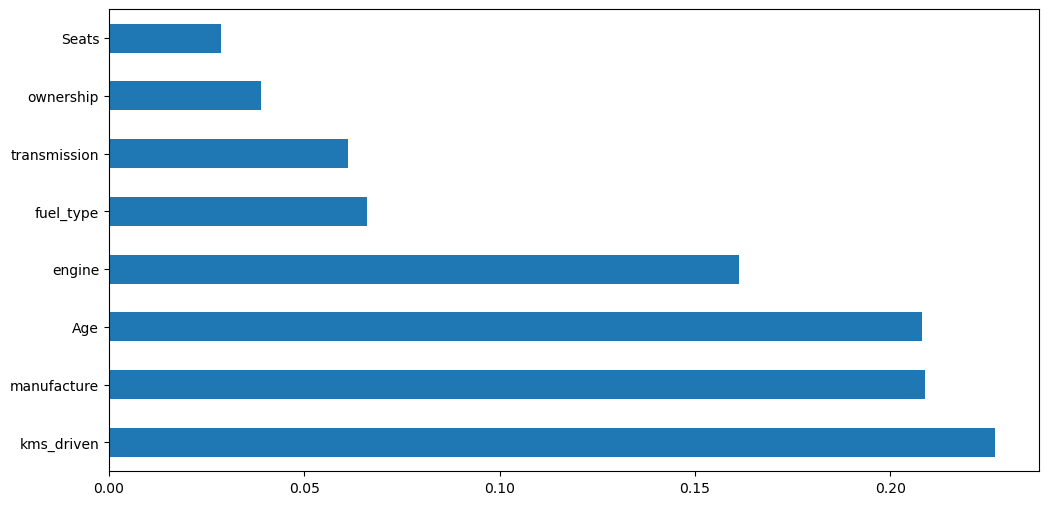

In [326]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# Desenvolvimento e avaliação de modelos


In [327]:
df_final = df2[['prices','kms_driven','transmission','engine','Age','manufacture','fuel_type','ownership','Seats']]


In [329]:
X = df_final.drop('prices', axis=1)
y = df_final['prices']

In [341]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state=101)

In [358]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
predictions =y_pred_rf 
print("R_squared :",r_squared)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R_squared : 0.4137485626684949
MAE: 1.2111095937049063
MSE: 2.5203268030763795
RMSE: 1.587553716595561


In [368]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

gbt = GradientBoostingRegressor(n_estimators=300,learning_rate=0.04, max_depth = 5, 
                                min_samples_split =2,min_samples_leaf=2)

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

predictions =y_pred_rf 


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R_squared : 0.5399564780546453
MAE: 1.2111095937049063
MSE: 2.5203268030763795
RMSE: 1.587553716595561


In [356]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=300, min_samples_leaf=1, random_state=0, n_jobs=-1)

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
predictions =y_pred_rf 



print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R_squared : 0.5004825528694388
MAE: 1.2111095937049063
MSE: 2.5203268030763795
RMSE: 1.587553716595561


### Otimização do modelo RandomForest

In [323]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [324]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [369]:
predictions=rf_random.predict(x_test)
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R_squared : 0.63537826137172
MAE: 1.0212644431667854
MSE: 1.8397073938620003
RMSE: 1.3563581362833343


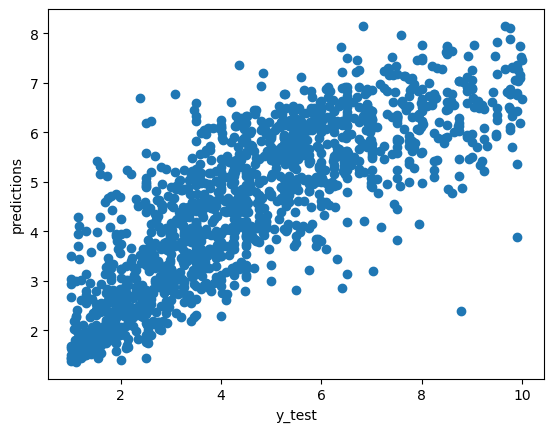

In [346]:
plt.scatter(y_test, predictions)   # real x predito
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show;


### Conclusão
 <p> Foram realizadas diversas etapas e testes de modelos utilizando o dataset fornecido, todavia os resultados obtidos ainda não se mostram promissores apesar de todo o trabalho realizado.</p>